<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Binary Clasification: From scratch</h2>
<div>

### Imports

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs

### Plotting function

In [2]:
def plot_points(x,y):    
    plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="skyblue", label="zeros")
    plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="salmon", label="ones")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis("equal")
    plt.legend()
    #plt.show()

### Syntatic data: XOR

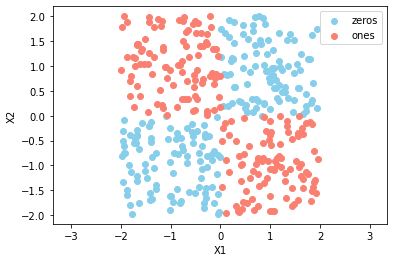

In [3]:
def xor_data(points:int, low, high):
    
    center = (high+low)/2    
    cluster_points = points // 4
    
    x1 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x2 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x = np.hstack((x1,x2))

    y = np.vstack(( np.zeros((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.zeros((cluster_points,1)) ))
    
    return x,y

x,y = xor_data(points=400, low=-2, high=2)
plot_points(x,y)

### TF

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Model
- Try `"relu"` and `"swish"`

In [5]:
inputs = keras.Input(shape=(2,), name="INPUT")
layer1 = layers.Dense(3, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_1')(inputs)
layer2 = layers.Dense(2, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_2')(layer1)
layer3 = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(layer2)

model = keras.Model(inputs=inputs, outputs=layer3)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 3)                 9         
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 2)                 8         
_________________________________________________________________
OUTPUT (Dense)               (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
all_w1 = []
all_w2 = []

def save_weights_per_epoch(batch, logs):
    global all_w1
    global all_w2
    
    w1, b1 = model.layers[1].get_weights()
    w2, b2 = model.layers[2].get_weights()
    
    all_w1.append(w1)
    all_w2.append(w2)

In [7]:
model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y, epochs=400, batch_size=64, callbacks=[keras.callbacks.LambdaCallback(on_epoch_begin=save_weights_per_epoch)])

pred = model.predict(x)

#plot_3d(x, y_true, model(x))

Epoch 1/400
7/7 [==============================] - 1s 2ms/step - loss: 0.7310 - accuracy: 0.4932
Epoch 2/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5719
Epoch 3/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5802
Epoch 4/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5754
Epoch 5/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.5757
Epoch 6/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6176
Epoch 7/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6071
Epoch 8/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.5879
Epoch 9/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6332
Epoch 10/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6146
Epoch 11/400
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9321
Epoch 168/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.9251
Epoch 169/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9427
Epoch 170/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1949 - accuracy: 0.9251
Epoch 171/400
7/7 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9479
Epoch 172/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.9481
Epoch 173/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9292
Epoch 174/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9591
Epoch 175/400
7/7 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9534
Epoch 176/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.9592
Epoch 177/400
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9763
Epoch 332/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9804
Epoch 333/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9790
Epoch 334/400
7/7 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9788
Epoch 335/400
7/7 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9813
Epoch 336/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9779
Epoch 337/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9773
Epoch 338/400
7/7 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9789
Epoch 339/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0584 - accuracy: 0.9783
Epoch 340/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9716
Epoch 341/400
7/7 [=====

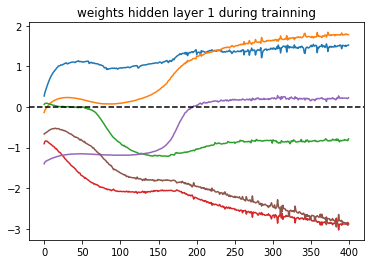

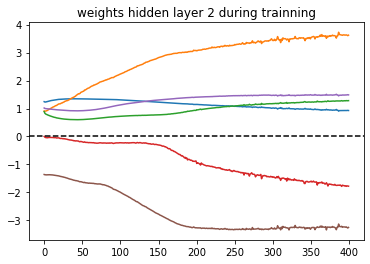

In [8]:
all_w1_np = np.array(all_w1)
all_w2_np = np.array(all_w2)

for i in range(all_w1_np.shape[1]):
    for j in range(all_w1_np.shape[2]):
        plt.plot(all_w1_np[:,i,j])
plt.axhline(0,  color='black', linestyle='dashed')
plt.title("weights hidden layer 1 during trainning")
plt.show()

for i in range(all_w2_np.shape[1]):
    for j in range(all_w2_np.shape[2]):
        plt.plot(all_w2_np[:,i,j])
plt.axhline(0,  color='black', linestyle='dashed')
plt.title("weights hidden layer 2 during trainning")
plt.show()

<ipython-input-9-43166a6e1a56>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, y, cmap="coolwarm")


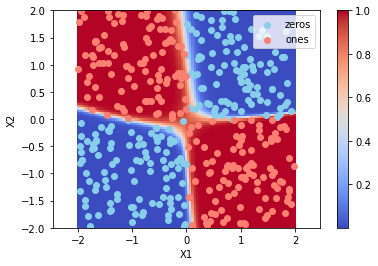

In [9]:
def plot_surface(minimum, maximun, resolution):

    x1_indexes = np.linspace(minimum, maximun, resolution)
    x2_indexes = np.linspace(minimum, maximun, resolution)

    x1, x2 = np.meshgrid(x1_indexes, x2_indexes)

    x = np.hstack(( x1.reshape(resolution*resolution,-1), x2.reshape(resolution*resolution,-1) ))

    y = model.predict(x).reshape(resolution, resolution)

    plt.pcolormesh(x1, x2, y, cmap="coolwarm")
    plt.colorbar()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis("equal")
    #plt.show()
    
plot_surface(minimum=-2, maximun=2, resolution=100)
plot_points(x,y)

<ipython-input-9-43166a6e1a56>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, y, cmap="coolwarm")


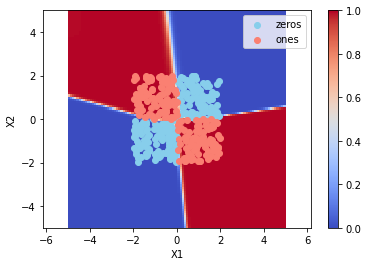

In [10]:
plot_surface(minimum=-5, maximun=5, resolution=100)
plot_points(x,y)

<ipython-input-9-43166a6e1a56>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, y, cmap="coolwarm")


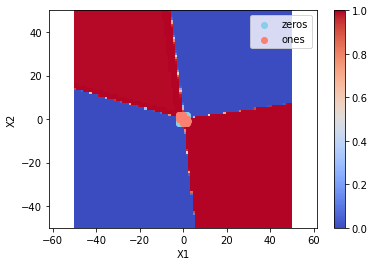

In [11]:
plot_surface(minimum=-50, maximun=50, resolution=100)
plot_points(x,y)